# Prediction of the temperature in Berlin, GER.

It was one of my first projects in Machine Learning. The dataset include the meteorological information from Berlin from the period between 1948 until 2019.

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
pd.options.display.width = 0
pd.options.display.max_rows = None
%matplotlib inline

## Reading and preparing data.

Let's read the data first and choose the most interesting features.

In [2]:
data = pd.read_csv('berlin_klima_1948_2019_en.txt', sep=';')
less_columns = ["Station_ID", "QN_3", "QN_4", "VPM", "eor", "Average_air_pressure", "Medium_Wind_Speed",
                "Precipitation_form", "Means_of_coverage", "Daily_mean_temp", "Daily_min_temp_ground"]
data.drop(less_columns, inplace=True, axis=1)

Lets replace some infinit numbers with NaN.

In [4]:
data = data.replace(-999.0, np.nan)
data = data.replace(-999, np.nan)
data.reset_index(inplace=True)
data = data.drop(['index'], axis=1)

In [6]:
pd.set_option('use_inf_as_na', True)
data = data.replace([np.inf, -np.inf], 0).dropna(subset=data.columns, how="all")

## Splitting and scalling data.

Beacause it is a continous data we I will split it by hand. To scale the data I will use MinMaxScaler.

In [8]:
predict = "Daily_max_temp"

X = np.array(data.drop([predict], axis=1))
y = np.array(data[predict])

In [9]:
'''SPLITTING FOR TIME SERIES'''
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Because of continous detaset I will use for cross validation TimeSeriesSplit().

In [10]:
tscv = TimeSeriesSplit(n_splits=10)

## Machine Learning Models.

* LINEAR REGRESSION

In [11]:
'''LINEAR REGRESSION'''
def lin_reg():
    linear = linear_model.LinearRegression()
    linear.fit(X_train_scaled, y_train)

    print("\nCross validation for Linear Regression:")
    lin_reg_scores = cross_val_score(linear, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=tscv)
    lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)
    display_scores(lin_reg_rmse_scores)

    predictions = linear.predict(X_test_scaled) # Gets a list of all predictions
    predictions_train = linear.predict(X_train_scaled)

    score_r2_lin = r2_score(y_test, predictions)
    print("\nR2 of Linear Regression test:\n", score_r2_lin)

    lin_mse = mean_squared_error(y_test, predictions)
    lin_rmse = np.sqrt(lin_mse)
    print("\nMSE of Linear Regression test:\n", lin_mse)
    print("\nRMSE of Linear Regression test:\n", lin_rmse)

    return predictions, predictions_train

* POLYNOMIAL FEATURES

In [12]:
'''POLYNOMIAL FEATURES'''
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
scaler.fit(X_train_poly)
# scaler.fit(X_test_poly)
X_train_poly_scaled = scaler.transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

* POLYNOMIAL REGRESSION

In [13]:
'''POLYNOMIAL FEATURES WITH LINEAR REGRESSION (POLYNOMIAL REGRESSION)'''
def poly_reg():
    linear = linear_model.LinearRegression()
    linear.fit(X_train_poly, y_train)

    print("\n\tCross validation for Polynomial Regression:")
    poly_reg_scores = cross_val_score(linear, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=tscv)
    poly_reg_rmse_scores = np.sqrt(-poly_reg_scores)
    display_scores(poly_reg_rmse_scores)

    predictions = linear.predict(X_test_poly)
    predictions_train = linear.predict(X_train_poly)

    score_r2_poly = r2_score(y_test, predictions)
    print("\nR2 of Polynomial Regression test:\n", score_r2_poly)

    lin_mse_poly = mean_squared_error(y_test, predictions)
    lin_rmse_poly = np.sqrt(lin_mse_poly)
    print("\nMSE of Polynomial Regression test:\n", lin_mse_poly)
    print("\nRMSE of Polynomial Regression test:\n", lin_rmse_poly)

    return predictions, predictions_train

* RIDGE REGRESSION

In [14]:
'''RIDGE REGRESSION'''
def ridge_reg():
    linear_ridge = linear_model.Ridge()
    linear_ridge.fit(X_train_scaled, y_train)

    print("\n\tCross validation for Ridge Regression:")
    ridge_reg_scores = cross_val_score(linear_ridge, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=tscv)
    ridge_reg_rmse_scores = np.sqrt(-ridge_reg_scores)
    display_scores(ridge_reg_rmse_scores)

    predictions = linear_ridge.predict(X_test_scaled)
    predictions_train = linear_ridge.predict(X_train_scaled)

    score_r2_ridge = r2_score(y_test, predictions)
    print("\nR2 of Ridge Regression test:\n", score_r2_ridge)

    lin_mse_ridge = mean_squared_error(y_test, predictions)
    lin_rmse_ridge = np.sqrt(lin_mse_ridge)
    print("\nMSE of Ridge Regression test:\n", lin_mse_ridge)
    print("\nRMSE of Ridge Regression test:\n", lin_rmse_ridge)
    return predictions, predictions_train

* RIDGE REGRESSION WITH POLYNOMIAL FEATURES

In [15]:
'''RIDGE REGRESSION WITH POLYNOMIAL FEATURES'''
def ridge_reg_poly():
    linear_ridge_poly = linear_model.Ridge()
    linear_ridge_poly.fit(X_train_poly_scaled, y_train)

    print("\n\tCross validation for Polynomial Ridge Regression:")
    poly_ridge_reg_scores = cross_val_score(linear_ridge_poly, X_train_poly_scaled, y_train,
                                            scoring="neg_mean_squared_error", cv=tscv)
    poly_ridge_reg_rmse_scores = np.sqrt(-poly_ridge_reg_scores)
    display_scores(poly_ridge_reg_rmse_scores)

    predictions = linear_ridge_poly.predict(X_test_poly_scaled)
    predictions_train = linear_ridge_poly.predict(X_train_poly_scaled)

    score_r2_ridge_poly = r2_score(y_test, predictions)
    print("\nR2 of Polynomial Ridge Regression test:\n", score_r2_ridge_poly)

    lin_mse_ridge_poly = mean_squared_error(y_test, predictions)
    lin_rmse_ridge_poly = np.sqrt(lin_mse_ridge_poly)
    print("\nMSE of Polynomial Ridge Regression test:\n", lin_mse_ridge_poly)
    print("\nRMSE of Polynomial Ridge Regression test:\n", lin_rmse_ridge_poly)
    return predictions, predictions_train

* RANDOM FOREST

In [16]:
'''RANDOM FOREST'''
def rand_forests():
    forest = RandomForestRegressor(n_jobs=-1, random_state=42)
    forest.fit(X_train, y_train)

    print("\n\tCross validation for Random Forest:")
    forest_scores = cross_val_score(forest, X_train, y_train, scoring="neg_mean_squared_error", cv=tscv)
    forest_rmse_scores = np.sqrt(-forest_scores)
    display_scores(forest_rmse_scores)

    predictions = forest.predict(X_test)
    predictions_train = forest.predict(X_train)

    score_r2_forest = r2_score(y_test, predictions)
    print("\nR2 of Random Forest test:\n", score_r2_forest)

    mse_random_forest = mean_squared_error(y_test, predictions)
    rmse_random_forest = np.sqrt(mse_random_forest)
    print("\nMSE of Random Forest test:\n", mse_random_forest)
    print("\nRMSE of Random Forest test:\n", rmse_random_forest)

    feature_names = list(data)
    print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), feature_names),
                reverse=True))

    return predictions, predictions_train

* GRADIENT BOOST REGRESSOR FOR RANDOM FOREST WITH EARLY STOPPING

In [17]:
'''GRADIENT BOOST REGRESSOR FOR RANDOM FOREST WITH EARLY STOPPING'''
def gbrt_1():
    gbrt = GradientBoostingRegressor(learning_rate=0.1)
    gbrt.fit(X_train, y_train)

    errors = [mean_squared_error(y_test, y_pred)
                for y_pred in gbrt.staged_predict(X_test)]
    bst_n_estimators = np.argmin(errors)

    gbrt_best = GradientBoostingRegressor(n_estimators=bst_n_estimators)
    gbrt_best.fit(X_train, y_train)

    print("\n\tCross validation for Gradient Boost Regressor:")
    gbrt_scores = cross_val_score(gbrt_best, X_train, y_train, scoring="neg_mean_squared_error", cv=tscv)
    gbrt_rmse_scores = np.sqrt(-gbrt_scores)
    display_scores(gbrt_rmse_scores)

    predictions = gbrt_best.predict(X_test)
    predictions_train = gbrt.predict(X_train)

    score_r2_gbrt_1 = r2_score(y_test, predictions)
    print("\nR2 of Random Gradient Boost Regressor test:\n", score_r2_gbrt_1)

    mse_gbrt = mean_squared_error(y_test, predictions)
    rmse_gbrt = np.sqrt(mse_gbrt)
    print("\nMSE of Gradient Boosting Reg with Early Stopping test:\n", mse_gbrt)
    print("\nRMSE of Gradient Boosting Reg with Early Stopping test:\n", rmse_gbrt)
    return predictions, predictions_train

* EXTREME GRADIENT BOOSTING

In [19]:
'''EXTREME GRADIENT BOOSTING'''
def xgb():
    xgb_reg = xgboost.XGBRegressor()
    xgb_reg.fit(X_train, y_train)

    print("\n\tCross validation for Extreme Gradient Boosting:")
    xgb_scores = cross_val_score(xgb_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=tscv)
    xgb_rmse_scores = np.sqrt(-xgb_scores)
    display_scores(xgb_rmse_scores)

    predictions = xgb_reg.predict(X_test)
    predictions_train = xgb_reg.predict(X_train)
    
    score_r2_xgb = r2_score(y_test, predictions)
    print("\nR2 of Extreme Gradient Boosting test:\n", score_r2_xgb)

    mse_xgb = mean_squared_error(y_test, predictions)
    rmse_xgb = np.sqrt(mse_xgb)
    print("\nMSE of Extreme Gradient Boosting Reg test:\n", mse_xgb)
    print("\nRMSE of Extreme Gradient Boosting Reg test:\n", rmse_xgb, "\n")

    xgb_reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10)
    predictions = xgb_reg.predict(X_test)
    return predictions, predictions_train

In [20]:
'''EVALUATION WITH CROSS-VALIDATION'''
def display_scores(scores):
    print("\nScores:\n", scores)
    print("Mean:\n", scores.mean())
    print("Standard deviation:\n", scores.std())


	Cross validation for Gradient Boost Regressor:

Scores:
 [2.45681241 2.60891237 2.71904613 2.39691827 2.41835414 2.18487289
 2.02697816 2.05414147 2.02513945 2.16819998]
Mean:
 2.3059375268508284
Standard deviation:
 0.23660644950398785

R2 of Random Gradient Boost Regressor test:
 0.9443361562711963

MSE of Gradient Boosting Reg with Early Stopping test:
 4.614403706082692

RMSE of Gradient Boosting Reg with Early Stopping test:
 2.14811631577126


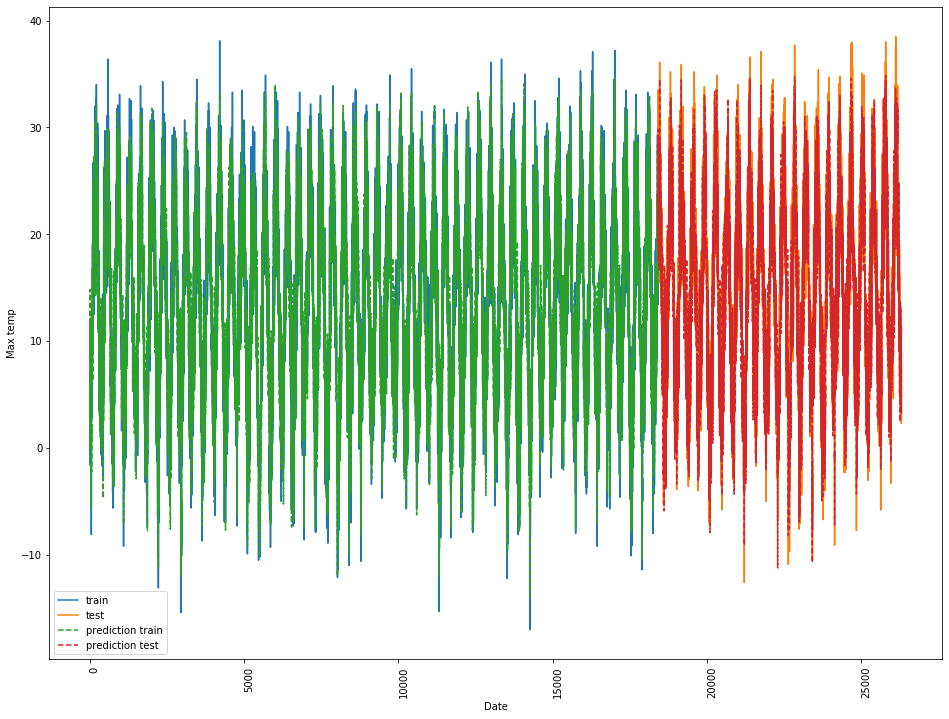

In [34]:
'''Lets try to plot some predictions'''
predictions, predictions_train = gbrt_1()

n_train = (len(data['Measurement_date'])) * 0.7
n_train = int(n_train)
# print(n_train)

plt.figure(figsize=(16, 12))
plt.xticks(rotation=90, ha="left")
plt.plot(range(n_train), y_train, label="train")
plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
plt.plot(range(n_train), predictions_train, '--', label="prediction train")
plt.plot(range(n_train, len(y_test) + n_train), predictions, '--', label="prediction test")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Max temp")
plt.show()

* LINEAR REGRESSION RESULTS:

Cross validation for Linear Regression:

Scores:
 [2.69014802 2.85776279 2.41132115 2.37598251 2.42985339 2.29297009
 2.15743709 2.20029233 2.13725814 2.26922508]

Mean:
 2.3822250588544547

Standard deviation:
 0.22101585344493974

------------------------------------------------
R2 of Linear Regression test:
 0.9263779505581495

MSE of Linear Regression test:
 6.103097361529968

RMSE of Linear Regression test:
 2.470444769981707

* POLYNOMIAL REGRESSION RESULTS:

Cross validation for Polynomial Regression:

Scores:
 [ 4.80482718  2.48830131  3.04636984  2.62600513 46.14622877  5.94219531
  3.2856642   2.10450459  2.06727117  2.12711101]

Mean:
 7.463847850614847

Standard deviation:
 12.950563259134865

-----------------------------------------
R2 of Polynomial Regression test:
 0.9322318138152672

MSE of Polynomial Regression test:
 5.617825657330935

RMSE of Polynomial Regression test:
 2.37019527831167

* RIDGE REGRESSION RESULTS:

Cross validation for Ridge Regression:

Scores:
 [2.40474235 2.82957922 2.4142921  2.37340007 2.43529665 2.29073264
 2.15844    2.19957283 2.13587742 2.27041034]

Mean:
 2.351234362847367

Standard deviation:
 0.1897243921099501

------------------------------------------------
R2 of Ridge Regression test:
 0.9262452047257254

MSE of Ridge Regression test:
 6.114101683547128

RMSE of Ridge Regression test:
 2.4726709614396993

* RIDGE REGRESSION WITH POLYNOMIAL FEATURES; RESULTS:

Cross validation for Polynomial Ridge Regression:

Scores:
 [2.4920935  2.85777905 2.3653337  2.32336092 2.39265696 2.14215718
 2.03544494 2.04889615 2.0033719  2.09349863]

Mean:
 2.275459293883859

Standard deviation:
 0.2537680772651603

-----------------------------------------
R2 of Polynomial Ridge Regression test:
 0.9384322757889232

MSE of Polynomial Ridge Regression test:
 5.103821722387828

RMSE of Polynomial Ridge Regression test:
 2.2591639432294035

* RANDOM FOREST RESULTS:

Cross validation for Random Forest:

Scores:
 [2.68005958 2.85854262 2.84061447 2.6206457  2.74873958 2.45223132
 2.32159746 2.25270899 2.22711817 2.24519145]

Mean:
 2.5247449323292614

Standard deviation:
 0.24123643401056097

-----------------------------------------
R2 of Random Forest test:
 0.9349815114683627

MSE of Random Forest test:
 5.389882091254753

RMSE of Random Forest test:
 2.3216119596639646

Features importance:
[(0.8692, 'Daily_max_temp'), (0.0788, 'Daily_mean_humidity'), (0.0205, 'Measurement_date'), (0.0138, 'Daily_sum_sunshine'), (0.0087, 'Precipitation_level'), (0.0073, 'Max_Wind_Speed'), (0.0015, 'Daily_snow_depth')]

* GRADIENT BOOST REGRESSOR RESULTS:

Cross validation for Gradient Boost Regressor:

Scores:
 [2.46144202 2.6106133  2.71846869 2.42573004 2.41835414 2.19251581
 2.02940613 2.05589875 2.02517665 2.16819998]

Mean:
 2.3105805499360836

Standard deviation:
 0.23740574825514552

------------------------------------------------
R2 of Random Gradient Boost Regressor test:
 0.9443361562711963

MSE of Gradient Boosting Reg with Early Stopping test:
 4.614403706082692

RMSE of Gradient Boosting Reg with Early Stopping test:
 2.14811631577126

* XGB RESULTS:

Cross validation for Extreme Gradient Boosting:
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Scores:
 [2.45119363 2.59078281 2.71517073 2.33522507 2.41367337 2.16860214
 2.0447308  2.05735058 2.02073665 2.16213441]

Mean:
 2.295960016382389

Standard deviation:
 0.23066893137791764

---------------------------------------------
R2 of Extreme Gradient Boosting test:
 0.9428718104874952

MSE of Extreme Gradient Boosting Reg test:
 4.735794579559151

RMSE of Extreme Gradient Boosting Reg test:
 2.17618808460095 

[14:28:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15.305
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:13.9334
[2]	validation_0-rmse:12.7045
[3]	validation_0-rmse:11.6005
[4]	validation_0-rmse:10.6201
[5]	validation_0-rmse:9.72642
[6]	validation_0-rmse:8.93128
[7]	validation_0-rmse:8.22914
[8]	validation_0-rmse:7.57611
[9]	validation_0-rmse:7.00887
[10]	validation_0-rmse:6.50235
[11]	validation_0-rmse:6.03035
[12]	validation_0-rmse:5.63829
[13]	validation_0-rmse:5.24719
[14]	validation_0-rmse:4.91378
[15]	validation_0-rmse:4.63882
[16]	validation_0-rmse:4.38901
[17]	validation_0-rmse:4.17356
[18]	validation_0-rmse:3.96963
[19]	validation_0-rmse:3.78511
[20]	validation_0-rmse:3.61669
[21]	validation_0-rmse:3.4738
[22]	validation_0-rmse:3.34785
[23]	validation_0-rmse:3.251
[24]	validation_0-rmse:3.15557
[25]	validation_0-rmse:3.05671
[26]	validation_0-rmse:2.97558
[27]	validation_0-rmse:2.91375
[28]	validation_0-rmse:2.85326
[29]	validation_0-rmse:2.80527
[30]	validation_0-rmse:2.75502
[31]	validation_0-rmse:2.70889
[32]	validation_0-rmse:2.66224
[33]	validation_0-rmse:2.62941
[34]	validation_0-rmse:2.59947
[35]	validation_0-rmse:2.57668
[36]	validation_0-rmse:2.55088
[37]	validation_0-rmse:2.52406
[38]	validation_0-rmse:2.50567
[39]	validation_0-rmse:2.48324
[40]	validation_0-rmse:2.47027
[41]	validation_0-rmse:2.45218
[42]	validation_0-rmse:2.44227
[43]	validation_0-rmse:2.42505
[44]	validation_0-rmse:2.4176
[45]	validation_0-rmse:2.40451
[46]	validation_0-rmse:2.39883
[47]	validation_0-rmse:2.38189
[48]	validation_0-rmse:2.37384
[49]	validation_0-rmse:2.36433
[50]	validation_0-rmse:2.35832
[51]	validation_0-rmse:2.35284
[52]	validation_0-rmse:2.34517
[53]	validation_0-rmse:2.34068
[54]	validation_0-rmse:2.3379
[55]	validation_0-rmse:2.33861
[56]	validation_0-rmse:2.33039
[57]	validation_0-rmse:2.31978
[58]	validation_0-rmse:2.31569
[59]	validation_0-rmse:2.31659
[60]	validation_0-rmse:2.31344
[61]	validation_0-rmse:2.31064
[62]	validation_0-rmse:2.30336
[63]	validation_0-rmse:2.30116
[64]	validation_0-rmse:2.29246
[65]	validation_0-rmse:2.28914
[66]	validation_0-rmse:2.28817
[67]	validation_0-rmse:2.28434
[68]	validation_0-rmse:2.28319
[69]	validation_0-rmse:2.28265
[70]	validation_0-rmse:2.27944
[71]	validation_0-rmse:2.27498
[72]	validation_0-rmse:2.27361
[73]	validation_0-rmse:2.27099
[74]	validation_0-rmse:2.26737
[75]	validation_0-rmse:2.26652
[76]	validation_0-rmse:2.26488
[77]	validation_0-rmse:2.2508
[78]	validation_0-rmse:2.24538
[79]	validation_0-rmse:2.24497
[80]	validation_0-rmse:2.22572
[81]	validation_0-rmse:2.2232
[82]	validation_0-rmse:2.21623
[83]	validation_0-rmse:2.21642
[84]	validation_0-rmse:2.2155
[85]	validation_0-rmse:2.20993
[86]	validation_0-rmse:2.20805
[87]	validation_0-rmse:2.20826
[88]	validation_0-rmse:2.19419
[89]	validation_0-rmse:2.19362
[90]	validation_0-rmse:2.19173
[91]	validation_0-rmse:2.19095
[92]	validation_0-rmse:2.18022
[93]	validation_0-rmse:2.17817
[94]	validation_0-rmse:2.1784
[95]	validation_0-rmse:2.17787
[96]	validation_0-rmse:2.17892
[97]	validation_0-rmse:2.17945
[98]	validation_0-rmse:2.17681
[99]	validation_0-rmse:2.17619